# DIABETIC PREDICTION

In [25]:
# Importing necessary modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
import pandas as pd
df = pd.read_csv("C:/Users/JEBINA P/Downloads/Diabetics.csv")  # Replace 'your_data.csv' with your actual data file.


In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
df.shape

(768, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [33]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [34]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [35]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions using the Random Forest classifier
y_test_prediction_rf = rf_classifier.predict(X_test)

# Print the predictions
print(y_test_prediction_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming you have already trained the Random Forest classifier (rf_classifier)
# Make predictions using the Random Forest classifier
y_test_prediction_rf = rf_classifier.predict(X_test)

# Create the comparison DataFrame
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction_rf})

# Display the first 10 rows of the DataFrame
print(comparison_rf.head(10))

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [41]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained and predicted using the Random Forest classifier (rf_classifier)
y_test_prediction_rf = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_test_prediction_rf)
print(f'Accuracy (Random Forest): {accuracy_rf}')

Accuracy (Random Forest): 0.8138528138528138


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming you have already trained the Decision Tree classifier (dt_classifier)
# Make predictions using the Decision Tree classifier
y_test_prediction_dt = dt_classifier.predict(X_test)

# Create the comparison DataFrame
comparison_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction_dt})

# Display the first 10 rows of the DataFrame
print(comparison_dt.head(10))

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [44]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained and predicted using the Decision Tree classifier (dt_classifier)
y_test_prediction_dt = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_dt = accuracy_score(y_test, y_test_prediction_dt)
print(f'Accuracy (Decision Tree): {accuracy_dt}')

Accuracy (Decision Tree): 0.70995670995671


In [45]:
from sklearn.svm import SVC

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
from sklearn.svm import SVC
import pandas as pd

# Assuming you have already trained the SVM classifier (svm_classifier)
# Make predictions using the SVM classifier
y_test_prediction_svm = svm_classifier.predict(X_test)

# Create the comparison DataFrame
comparison_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction_svm})

# Display the first 10 rows of the DataFrame
print(comparison_svm.head(10))

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [47]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained and predicted using the SVM classifier (svm_classifier)
y_test_prediction_svm = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_svm = accuracy_score(y_test, y_test_prediction_svm)
print(f'Accuracy (SVM): {accuracy_svm}')

Accuracy (SVM): 0.7922077922077922


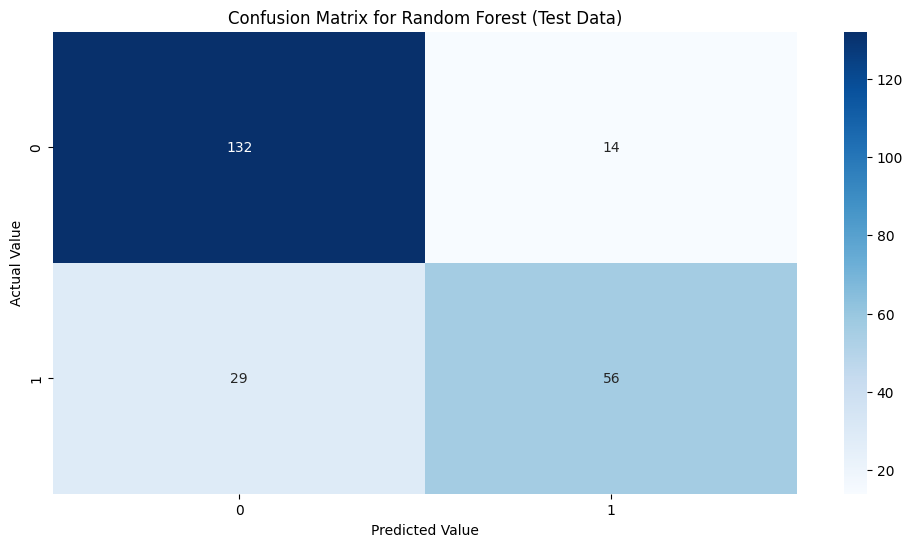

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using the Random Forest classifier (rf_classifier)
y_test_prediction_rf = rf_classifier.predict(X_test)

# Create the confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_test_prediction_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest (Test Data)")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [50]:
from sklearn.metrics import classification_report

# Assuming you have already trained and predicted using the Random Forest classifier (rf_classifier)
y_test_prediction_rf = rf_classifier.predict(X_test)

# Generate and print the classification report
report_rf = classification_report(y_test, y_test_prediction_rf)
print("Classification Report for Random Forest:\n", report_rf)


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       146
           1       0.80      0.66      0.72        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

